# Group Project
#### **FINN43815 - Python for Finance**

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import plotly.express as px
import yfinance as yf
import missingno as msno

## 1. Data Exploration

Variable	Definition	Bloomberg field name
- price: Closing price	(PX_LAST)
- volume: Traded volume (daily)	(PX_VOLUME)
- turnover: Traded value (daily) (VWAP_TURNOVER)
- p2e: Price-to-earnings ratio	(PE_RATIO)
- p2b: Price-to-book ratio	(PX_TO_BOOK_RATIO)
- cap: Market capitalisation	(CUR_MKT_CAP)
- rsi: Relative strength index (1 month)	(RSI_30D)
- lev: Leverage ratio	(TOT_DEBT_TO_TOT_ASSET)
- div_ratio: Dividend payout ratio	(DVD_PAYOUT_RATIO)
- prof_gr: Profit growth (GROSS_PROFIT_GROWTH)
- roc: Return on capital (RETURN_ON_CAP)
- asset_gr: Asset growth (ASSET_GROWTH)
- prof_ma: Profit margin (PROF_MARGIN)
- eps: Earnings per share (IS_EPS)
- short: Short interest	(SHORT_INT_RATIO)


In [2]:
df = pd.read_csv("pyfin_assig_data.csv")

/var/folders/ch/yj3xbk4s1t34gtb89jtxcmcr0000gn/T/ipykernel_31297/1251261843.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("pyfin_assig_data.csv")


In [3]:
df

,date,permno,price,volume,turnover,p2e,p2b,cap,rsi,lev,div_ratio,prof_gr,roc,asset_gr,prof_ma,eps,short
0,1990-01-31,0111145D UN Equity,20.6875,49200.0,NaN,NaN,NaN,1226.3674,44.1860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-02-28,0111145D UN Equity,22.0000,141600.0,NaN,NaN,NaN,1303.3636,57.2650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-03-30,0111145D UN Equity,19.5000,32400.0,NaN,NaN,NaN,1155.2541,27.9070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-04-30,0111145D UN Equity,17.6250,219400.0,NaN,NaN,1.5612,1021.1925,18.0328,23.7282,35.7103,NaN,NaN,NaN,6.9403,0.745,NaN
4,1990-05-31,0111145D UN Equity,19.8125,128800.0,NaN,NaN,1.7550,1147.9362,60.3960,23.7282,35.7103,NaN,NaN,NaN,6.9403,0.745,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569179,2022-04-29,J UN Equity,138.5500,304510.0,3.614403e+07,24.8843,2.9386,17902.9731,50.4985,27.0080,64.0717,13.4805,5.0913,-2.4340,2.3165,0.690,2.156
569180,2022-05-31,J UN Equity,140.0900,439716.0,5.694903e+07,25.1609,2.9712,18019.3940,46.5970,27.0080,64.0717,13.4805,5.0913,-2.4340,2.3165,0.690,2.588
569181,2022-06-30,J UN Equity,127.1300,361201.0,3.957354e+07,22.8332,2.6964,16352.3846,41.4452,27.0080,64.0717,13.4805,5.0913,-2.4340,2.3165,0.690,2.524
569182,2022-07-29,J UN Equity,137.3000,214654.0,2.401931e+07,23.1310,2.9522,17660.5239,64.8821,29.7452,15.0218,0.9230,5.534,-3.2025,5.1209,1.530,5.503


In [4]:
# number of different stocks
len(df.permno.unique())

1452

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569184 entries, 0 to 569183
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       569184 non-null  object 
 1   permno     569184 non-null  object 
 2   price      334294 non-null  float64
 3   volume     333783 non-null  float64
 4   turnover   236329 non-null  float64
 5   p2e        277818 non-null  float64
 6   p2b        306044 non-null  float64
 7   cap        332877 non-null  float64
 8   rsi        333119 non-null  float64
 9   lev        376973 non-null  float64
 10  div_ratio  319959 non-null  float64
 11  prof_gr    289776 non-null  float64
 12  roc        270299 non-null  object 
 13  asset_gr   358912 non-null  float64
 14  prof_ma    383415 non-null  float64
 15  eps        375228 non-null  float64
 16  short      152198 non-null  float64
dtypes: float64(14), object(3)
memory usage: 73.8+ MB


In [6]:
# convert date columns to datetime
df["date"] = pd.to_datetime(df.date)

In [7]:
# set index to date
df = df.set_index("date")

### Exploration of Missing Data

<Axes: >

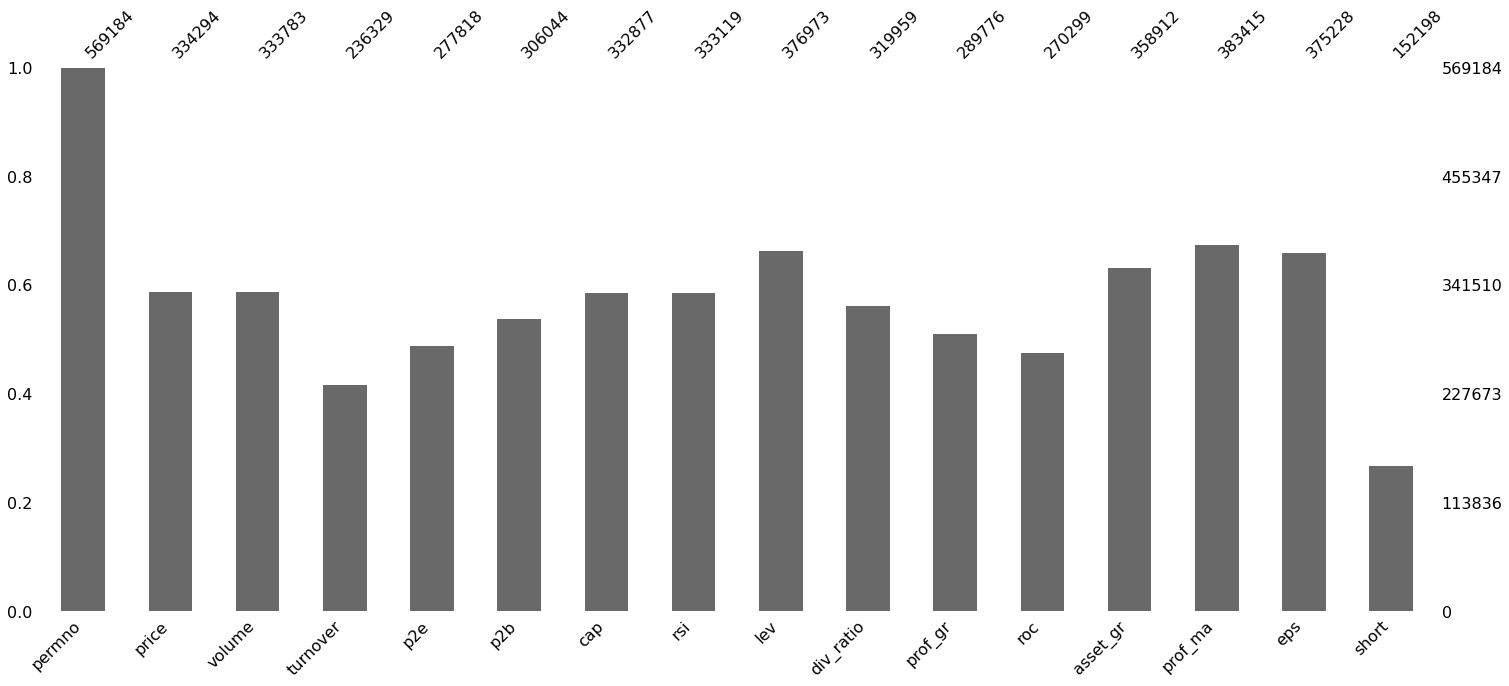

In [8]:
msno.bar(df)

<Axes: >

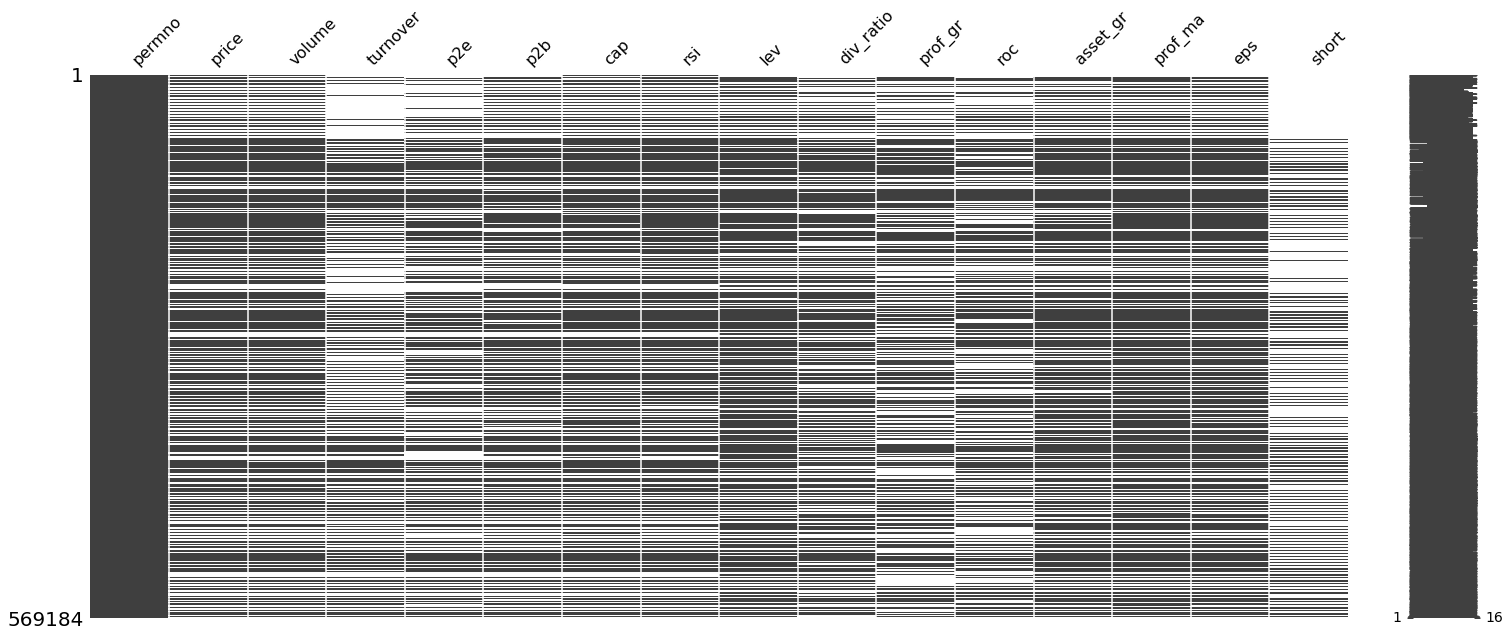

In [9]:
msno.matrix(df)

The different variables seem to have a vary similar pattern regarding missing values

In [10]:
# missing prices for differnt stocks
df_test_missing = df.isnull()
df_test_missing["permno"] = df.permno
px.bar(df_test_missing.groupby("permno")["price"].sum().sort_values())

In [11]:
df_test_missing.groupby("permno")["price"].sum().sort_values(ascending=False)

permno
9990213D UN Equity    392
1541931D UA Equity    392
1437355D US Equity    392
9995522D UN Equity    392
WBD UW Equity         387
                     ... 
ROL UN Equity           0
ED UN Equity            0
BBWI UN Equity          0
BBY UN Equity           0
CAL UN Equity           0
Name: price, Length: 1452, dtype: int64

In [12]:
# testing if all companies (permno) have same amount of data points
(df_test_missing.groupby("permno").count() != 392).any()

price        False
volume       False
turnover     False
p2e          False
p2b          False
cap          False
rsi          False
lev          False
div_ratio    False
prof_gr      False
roc          False
asset_gr     False
prof_ma      False
eps          False
short        False
dtype: bool

For every company (permno) we have a total of 392 data points

In [13]:
# relative number of missing prices
df_test_missing = df.isnull()
df_test_missing["permno"] = df.permno
px.bar(df_test_missing.groupby("permno")["price"].sum().div(392).sort_values())

In [14]:
df_test_missing.groupby("permno")["price"].sum().div(392).sort_values(ascending=False)[range(50)]

/var/folders/ch/yj3xbk4s1t34gtb89jtxcmcr0000gn/T/ipykernel_31297/2272349530.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



permno
9990213D UN Equity    1.000000
1541931D UA Equity    1.000000
1437355D US Equity    1.000000
9995522D UN Equity    1.000000
WBD UW Equity         0.987245
2292198Q UN Equity    0.984694
EMBC UW Equity        0.984694
1624Q UQ Equity       0.982143
ZIMV UW Equity        0.982143
CEG UW Equity         0.979592
1270Q UQ Equity       0.979592
3362726Q UN Equity    0.977041
BKR UW Equity         0.977041
NBL UW Equity         0.974490
BXLT UN Equity        0.969388
SLVM UN Equity        0.969388
CPGX UN Equity        0.966837
CPGX US Equity        0.966837
GBLXQ UN Equity       0.964286
DTM UN Equity         0.961735
519239Q UN Equity     0.961735
601964Q US Equity     0.959184
HON UW Equity         0.959184
3123863Q UN Equity    0.959184
OGN UN Equity         0.959184
1431816D UW Equity    0.956633
0867887D UN Equity    0.956633
2009Q UN Equity       0.951531
USHC UQ Equity        0.951531
643319Q UN Equity     0.951531
PNAA US Equity        0.948980
1503Q UN Equity       0.948980
T

In [15]:
# explore missing values for stocks with many missing values
px.line(df[df.permno == "355488Q UN Equity"].price)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [16]:
px.line(df[df.permno == "204923Q UN Equity"].price)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [17]:
df_test_missing[["permno", "price"]]

,permno,price
date,,
1990-01-31,0111145D UN Equity,False
1990-02-28,0111145D UN Equity,False
1990-03-30,0111145D UN Equity,False
1990-04-30,0111145D UN Equity,False
1990-05-31,0111145D UN Equity,False
...,...,...
2022-04-29,J UN Equity,False
2022-05-31,J UN Equity,False
2022-06-30,J UN Equity,False


In [18]:
df_test_available = df_test_missing[["permno", "price"]]
df_test_available.loc[:, "price"] = ~df_test_available["price"]

In [19]:
df_test_available

,permno,price
date,,
1990-01-31,0111145D UN Equity,True
1990-02-28,0111145D UN Equity,True
1990-03-30,0111145D UN Equity,True
1990-04-30,0111145D UN Equity,True
1990-05-31,0111145D UN Equity,True
...,...,...
2022-04-29,J UN Equity,True
2022-05-31,J UN Equity,True
2022-06-30,J UN Equity,True


In [20]:
df_pivot_missing = df_test_available.reset_index().pivot(index="date", columns="permno", values="price").cumsum(axis=0)

In [21]:
df_pivot_missing

permno,0111145D UN Equity,0202445Q UN Equity,0203524D UN Equity,0226226D UN Equity,0376152D US Equity,0440296D UN Equity,0544749D UN Equity,0574018D UN Equity,0598884D UQ Equity,0598884D US Equity,...,YUM UN Equity,YUMC UN Equity,ZBH UN Equity,ZBRA UW Equity,ZETHQ US Equity,ZIMV UW Equity,ZION UQ Equity,ZION UW Equity,ZRN UN Equity,ZTS UN Equity
date,,,,,,,,,,,,,,,,,,,,,
1990-01-31,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,1,0,1,1,1,0
1990-02-28,2,2,2,2,2,2,2,2,0,2,...,0,0,0,0,2,0,2,2,2,0
1990-03-30,3,3,3,3,3,3,3,2,0,3,...,0,0,0,0,3,0,3,3,3,0
1990-04-30,4,4,4,4,4,4,4,3,0,4,...,0,0,0,0,4,0,4,4,4,0
1990-05-31,5,5,5,5,5,5,5,4,0,5,...,0,0,0,0,5,0,5,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,263,246,260,235,202,75,199,212,45,104,...,296,67,250,369,118,3,388,388,101,111
2022-05-31,263,246,260,235,202,75,199,212,45,104,...,297,68,251,370,118,4,389,389,101,112
2022-06-30,263,246,260,235,202,75,199,212,45,104,...,298,69,252,371,118,5,390,390,101,113


In [22]:
df_pivot_missing.idxmax()

permno
0111145D UN Equity   2011-11-30
0202445Q UN Equity   2010-06-30
0203524D UN Equity   2011-08-31
0226226D UN Equity   2009-07-31
0376152D US Equity   2006-10-31
                        ...    
ZIMV UW Equity       2022-08-30
ZION UQ Equity       2022-08-30
ZION UW Equity       2022-08-30
ZRN UN Equity        1998-05-29
ZTS UN Equity        2022-08-30
Length: 1452, dtype: datetime64[ns]

In [23]:
df_pivot_missing.replace(0, np.nan).idxmin().to_frame()

/var/folders/ch/yj3xbk4s1t34gtb89jtxcmcr0000gn/T/ipykernel_31297/2975795845.py:1: FutureWarning:

The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError



,0
permno,
0111145D UN Equity,1990-01-31
0202445Q UN Equity,1990-01-31
0203524D UN Equity,1990-01-31
0226226D UN Equity,1990-01-31
0376152D US Equity,1990-01-31
...,...
ZIMV UW Equity,2022-02-28
ZION UQ Equity,1990-01-31
ZION UW Equity,1990-01-31


In [24]:
df_start_end = df_pivot_missing.replace(0, np.nan).idxmin().to_frame()

/var/folders/ch/yj3xbk4s1t34gtb89jtxcmcr0000gn/T/ipykernel_31297/3586882586.py:1: FutureWarning:

The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError



In [25]:
df_start_end["end"] = df_pivot_missing.idxmax()
df_start_end = df_start_end.rename(columns={0:"start"})

In [26]:
df_start_end

,start,end
permno,,
0111145D UN Equity,1990-01-31,2011-11-30
0202445Q UN Equity,1990-01-31,2010-06-30
0203524D UN Equity,1990-01-31,2011-08-31
0226226D UN Equity,1990-01-31,2009-07-31
0376152D US Equity,1990-01-31,2006-10-31
...,...,...
ZIMV UW Equity,2022-02-28,2022-08-30
ZION UQ Equity,1990-01-31,2022-08-30
ZION UW Equity,1990-01-31,2022-08-30


In [27]:
df_start_end.groupby("start").size().sort_values(ascending=False).to_frame()

,0
start,
1990-01-31,736
1994-12-30,23
1995-11-30,12
1992-06-30,11
1990-02-28,8
...,...
2009-02-27,1
2008-11-28,1
2008-07-31,1


In [28]:
df_start_end.groupby("start").size().to_frame().cumsum()

,0
start,
1990-01-31,736
1990-02-28,744
1990-03-30,747
1990-04-30,748
1990-05-31,749
...,...
2021-12-31,1444
2022-01-31,1445
2022-02-28,1446


In [29]:
df_start_end.groupby("end").size().sort_values(ascending=False).to_frame()

,0
end,
2022-08-30,719
1999-09-30,8
2008-12-31,8
2006-10-31,8
2000-05-31,8
...,...
2011-06-30,1
2011-04-29,1
1999-01-29,1


In [30]:
df_start_end.groupby(["start", "end"]).size().sort_values(ascending=False).to_frame()

0
start      end            
1990-01-31 2022-08-30  295
           2008-12-31    7
           1999-09-30    6
1995-11-30 2022-08-30    6
1990-01-31 1998-09-30    6
...                    ...
1993-07-30 2006-10-31    1
1993-06-30 2022-08-30    1
           2021-04-30    1
1993-05-28 2010-05-28    1
2022-04-29 2022-08-30    1

[733 rows x 1 columns]

In [31]:
# remove stocks which only have missing values
# check if stocks have missing values, within the timespan the stock was actually available (if so then replace missing values)

In [32]:
# get stocks which only contain missing values 
rmv_stocks = list(df_start_end[(df_start_end.start.isnull() == True) | (df_start_end.end.isnull() == True)].index)

In [33]:
df

,permno,price,volume,turnover,p2e,p2b,cap,rsi,lev,div_ratio,prof_gr,roc,asset_gr,prof_ma,eps,short
date,,,,,,,,,,,,,,,,
1990-01-31,0111145D UN Equity,20.6875,49200.0,NaN,NaN,NaN,1226.3674,44.1860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-28,0111145D UN Equity,22.0000,141600.0,NaN,NaN,NaN,1303.3636,57.2650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-03-30,0111145D UN Equity,19.5000,32400.0,NaN,NaN,NaN,1155.2541,27.9070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-04-30,0111145D UN Equity,17.6250,219400.0,NaN,NaN,1.5612,1021.1925,18.0328,23.7282,35.7103,NaN,NaN,NaN,6.9403,0.745,NaN
1990-05-31,0111145D UN Equity,19.8125,128800.0,NaN,NaN,1.7550,1147.9362,60.3960,23.7282,35.7103,NaN,NaN,NaN,6.9403,0.745,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,J UN Equity,138.5500,304510.0,3.614403e+07,24.8843,2.9386,17902.9731,50.4985,27.0080,64.0717,13.4805,5.0913,-2.4340,2.3165,0.690,2.156
2022-05-31,J UN Equity,140.0900,439716.0,5.694903e+07,25.1609,2.9712,18019.3940,46.5970,27.0080,64.0717,13.4805,5.0913,-2.4340,2.3165,0.690,2.588
2022-06-30,J UN Equity,127.1300,361201.0,3.957354e+07,22.8332,2.6964,16352.3846,41.4452,27.0080,64.0717,13.4805,5.0913,-2.4340,2.3165,0.690,2.524


In [34]:
# remove stocks
df_rmv = df[~df.permno.isin(rmv_stocks)]

In [35]:
df_rmv.permno.unique()

array(['0111145D UN Equity', '0202445Q UN Equity', '0203524D UN Equity',
       ..., 'ON UW Equity', 'VICI UN Equity', 'J UN Equity'], dtype=object)

In [36]:
df_start_end.loc["0111145D UN Equity"]

start   1990-01-31
end     2011-11-30
Name: 0111145D UN Equity, dtype: datetime64[ns]

In [37]:
px.line(df_rmv[df_rmv.permno == "0111145D UN Equity"].price)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [38]:
df[(df.permno == "0111145D UN Equity")].loc[df_start_end.loc["0111145D UN Equity"].start:df_start_end.loc["0111145D UN Equity"].end].price.isnull().sum()

0

In [39]:
len(df_rmv.permno.unique())

1448

In [40]:
# check if there are missing within the trading period
n_list = []
for stock in df_rmv.permno.unique():
    n = df_rmv[(df_rmv.permno == stock)].loc[df_start_end.loc[stock].start:df_start_end.loc[stock].end].price.isnull().sum()
    n_list.append(n)


In [41]:
df_n_missing = pd.DataFrame({
    "permno": df_rmv.permno.unique(),
    "number_missings": n_list
})

In [42]:
df_n_missing[df_n_missing.number_missings != 0].sort_values(by="number_missings", ascending=False)

,permno,number_missings
206,BF/B UA Equity,314
559,PARA UA Equity,221
1183,PSX UN Equity,207
408,PNAA US Equity,196
790,DVN UA Equity,156
...,...,...
1149,URBN UW Equity,1
516,FMCC UN Equity,1
514,TRV UN Equity,1
475,VAT UN Equity,1


In [43]:
px.line(df_rmv[df_rmv.permno == "PARA UA Equity"].price)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [44]:
px.line(df_rmv[df_rmv.permno == "DVN UA Equity"].price)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [45]:
df_n_missing[df_n_missing.number_missings > 5].sort_values(by="number_missings", ascending=False)

,permno,number_missings
206,BF/B UA Equity,314
559,PARA UA Equity,221
1183,PSX UN Equity,207
408,PNAA US Equity,196
790,DVN UA Equity,156
...,...,...
919,VNO UN Equity,8
296,GWOW UN Equity,8
1187,1288453D UW Equity,7
1248,MNST UW Equity,7


In [46]:
rmv_stocks = df_n_missing[df_n_missing.number_missings > 0].sort_values(by="number_missings", ascending=False).permno.unique()

In [47]:
rmv_stocks

array(['BF/B UA Equity', 'PARA UA Equity', 'PSX UN Equity',
       'PNAA US Equity', 'DVN UA Equity', 'NBR UA Equity',
       'ETFC UN Equity', '1539941D UN Equity', 'CA UN Equity',
       'CME UN Equity', 'SBUX UA Equity', 'ADP UN Equity',
       'TFCFA UN Equity', 'MYL UN Equity', 'MAT UN Equity',
       'BMC UQ Equity', 'BMC UW Equity', 'MU UN Equity',
       'WINMQ UN Equity', 'UAL UW Equity', 'SPLS UA Equity',
       'GIDL US Equity', 'HAS UN Equity', 'CAR UN Equity',
       'PCH UN Equity', 'RRD UN Equity', 'HBAN UA Equity',
       'VIAB UN Equity', 'SLM UN Equity', 'FTRCQ UN Equity',
       'TXN UN Equity', 'ADI UN Equity', 'MDLZ UN Equity',
       'WDC UN Equity', 'ETFC UW Equity', 'AVATQ US Equity',
       'NVDA UA Equity', '69895Q UN Equity', 'GENZ UA Equity',
       'GT UN Equity', 'SXCL UQ Equity', 'VTSS UQ Equity',
       'CMVT UQ Equity', 'SKY UN Equity', 'MAR UN Equity',
       'BNSSA US Equity', 'SCHW UN Equity', 'RRC UN Equity',
       'EHC UN Equity', 'SWKS UW Equity'

In [48]:
df_rmv_2 = df_rmv[~df_rmv.permno.isin(rmv_stocks)]

In [49]:
df_rmv_2.to_csv("cleaned_data.csv")